Bayes' Theorem
=============

Motivation
----------

In whole-genome analyses, the number $k$ of marker covariates typically
exceeds the number of $n$ of observations. In this situation, least
squares methods cannot be used to simultaneously estimate the effects of
all the $k$ marker covariates. One of the most widely used methods to
overcome this problem is Bayesian inference, where prior information
about marker effects is combined with the data to make inferences about
the marker effects. In Bayesian inference, inferences are based on
conditional probabilities, and the Bayes theorem is a statement on
conditional probability.

Conditional Probability of $X$ Given $Y$
----------------------------------------

Suppose $X$ and $Y$are two random variables with joint probability
distribution $\Pr(X,Y)$. Then, the conditional probability of $X$ given
$Y$ is given by Bayes theorem as

$$
\Pr(X|Y)  =  \frac{\Pr(X,Y)}{\Pr(Y)} \tag{1}
$$

where $\Pr(Y)$ is the probability distribution of $Y$. Similarly, the
the conditional probability of $Y$ given $X$ is

$$
\Pr(Y|X)=\frac{\Pr(X,Y)}{\Pr(X)},
$$ 

which upon rearranging gives

$$\Pr(X,Y)=\Pr(Y|X)\Pr(X). \tag{2}$$

Then, substituting (2) in (1) gives

$$\begin{eqnarray} 
\Pr(X|Y)  &= &\frac{\Pr(X,Y)}{\Pr(Y)}\\
          &= &\frac{\Pr(Y|X)\Pr(X)}{\Pr(Y)},
\end{eqnarray}$$

which is the form of the formula that is used for inference of $X$ given
$Y.$


Bayes' Theorem by Example
----------------------------------------------

Here we consider a simple example to justify the formula
(1). The following table gives the joint distribution of
smoking and lung cancer in a hypothetical population of 1,000,000
individuals.

$$
\begin{array}{c|lcr}
n & \text{Yes} & \text{No} & \text{Right} \\
\hline
\text{Yes} & 42,500 & 7,500 & 50,000 \\
\text{No} & 207,500 & 742,500 & 950,000 \\
 & 250,000 & 750,000 
\end{array}
$$

Given these numbers, consider how you would compute the relative
frequency of lung cancer among smokers. 

There are a total of 250,000
smokers in this population, and among these 250,000 individuals, 42,500
have lung cancer. So, relative frequency of lung cancer among smokers is
$\frac{42,500}{250,000}$. 

As we reason below, this relative frequency is
also the conditional probability of lung cancer given the individual is
a smoker.

1.  The frequentist definition of probability of an event is the
    limiting value of its relative frequency in a “large” number of
    trials.

2.  Suppose we sample with replacement individuals from the 250,000
    smokers and compute the relative frequency of the incidence of lung
    cancer.

3.  It can be shown that as the sample size goes to infinity, this
    relative frequency will approach $\frac{42,500}{250,000}=0.17$.

4.  This ratio can also be written as
    $$\frac{42,500/1,000,000}{250,000/1,000,000}=0.17.$$

5.  The ratio in the numerator is the joint probability of smoking and
    lung cancer, and the ratio in the denominator is the marginal
    probability of smoking.





#### Simulated Data for Human Height

In [ ]:
using Pkg
Pkg.add("Plots")

In [56]:
using Plots,Statistics,DataFrames

In [102]:
mean_male   = 170
sd_male     = 5
mean_female = 159
sd_female   = 5
nind_male   = 1200
nind_female = 800
males       = mean_male .+ randn(nind_male)*sd_male
females     = mean_female .+ randn(nind_female)*sd_female
data=[convert.(Int,round.(males))  fill("male",nind_male)
      convert.(Int,round.(females)) fill("female",nind_female)];
data = DataFrame(height=data[:,1],gender=data[:,2])

,height,gender
,Any,Any
1,165,male
2,170,male
3,176,male
4,172,male
5,162,male
6,168,male
7,172,male
8,174,male
9,171,male


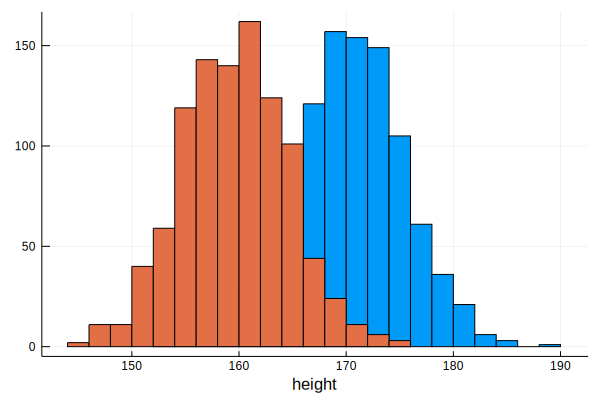

In [101]:
plot(data[data[:gender].=="male",:height],seriestype=:histogram,xlabel=:height,legend=:none) 
plot!(data[data[:gender].=="female",:height],seriestype=:histogram) 

#### Questions
1. Consider the population simulated above. For a randomly sampled person of height equal to 150cm, what is the probability for the person being a female?
    1. What is the joint probability for a randomly sampled person to be of height 150cm and a female? 
    2. What is the marginal probability for a randomly sampled person to be of height 150cm?
    3. What is the conditional probability for a person being a female given that the person's height is 150cm? 
2. Repeat question 1 for a randomly sampled person of height:
    1. equal to 170cm
    2. equal to 180cm
    3. larger than 170cm

##### Julia commands useful for excercise

In [130]:
height=170

170

In [131]:
num_joint=count((data[:height].> height) .& (data[:gender] .== "female"))

7

In [132]:
den_joint=size(data,1)

2000

In [133]:
p_joint = num_joint/den_joint

0.0035

In [134]:
num_mar=count((data[:height].== height))
den_mar=size(data,1)
p_mar=num_mar/den_mar

0.0455

In [135]:
p_cond = p_joint/p_mar

0.07692307692307693